# 필수 설치

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.6 MB/s eta 0:00:00


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 다운로드한 자료 이름

1. customers
2. geo
3. items
4. payments
5. reviews
6. orders
7. products
8. sellers


In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/1번째 프로젝트_250702~250709/olist_customers_dataset.csv')

In [ ]:
geo = pd.read_csv('/content/drive/MyDrive/1번째 프로젝트_250702~250709/olist_geolocation_dataset.csv')

In [ ]:
items = pd.read_csv('/content/drive/MyDrive/1번째 프로젝트_250702~250709/olist_order_items_dataset.csv')

In [ ]:
payments = pd.read_csv('/content/drive/MyDrive/1번째 프로젝트_250702~250709/olist_order_payments_dataset.csv')

In [ ]:
reviews = pd.read_csv('/content/drive/MyDrive/1번째 프로젝트_250702~250709/olist_order_reviews_dataset.csv')

In [ ]:
orders = pd.read_csv('/content/drive/MyDrive/1번째 프로젝트_250702~250709/olist_orders_dataset.csv')

In [ ]:
products = pd.read_csv('/content/drive/MyDrive/1번째 프로젝트_250702~250709/olist_products_dataset.csv')

In [ ]:
sellers = pd.read_csv('/content/drive/MyDrive/1번째 프로젝트_250702~250709/olist_sellers_dataset.csv')

In [ ]:
orders = pd.read_csv('/content/drive/MyDrive/1번째 프로젝트_250702~250709/olist_orders_dataset.csv')

In [ ]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

In [ ]:
end = orders['order_delivered_customer_date']

In [ ]:
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [ ]:
start = orders['order_estimated_delivery_date']

## 배송지연 관련 수치

> ### 이상치 포함
- 배송지연 건수 6535건(estimated delivery date보다 1일 이상 늦으면 배송지연)
- 전체 배달 건수에서 배송지연 비율 6.571736004263835
- 최대 188일, 평균 8.8일, 표준편차 13.94, 사분위수 10일상



In [ ]:
# 지연일 계산: 배송일 - 배송예상일
orders['shipping_delay_days'] = orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']
# 날짜 차이 계산 (timedelta)
delay = orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']
# 일수로 변환
delay_days = delay.dt.days
# 일수(int)로 비교
delayed_df = orders[delay_days >= 1]
delayed_df.shape

(6535, 9)

In [ ]:
df = (end - start)
df = pd.DataFrame(df)
filtered_negative_df = df.loc[df[0].dt.days >= 1]
filtered_negative_df
# 6535건

,0
20,11 days 22:23:46
25,9 days 22:03:54
41,7 days 18:59:23
57,1 days 13:28:46
58,7 days 13:37:16
...,...
99396,5 days 00:03:26
99397,3 days 19:59:49
99423,21 days 17:06:59
99425,2 days 00:48:31


In [ ]:
filtered_negative_df.shape

(6535, 1)

In [ ]:
orders.shape

(99441, 9)

In [ ]:
delivery_late_rate = filtered_negative_df.shape[0]/orders.shape[0] *100
delivery_late_rate
#전체 배달 건수에서 배송지연 비율

6.571736004263835

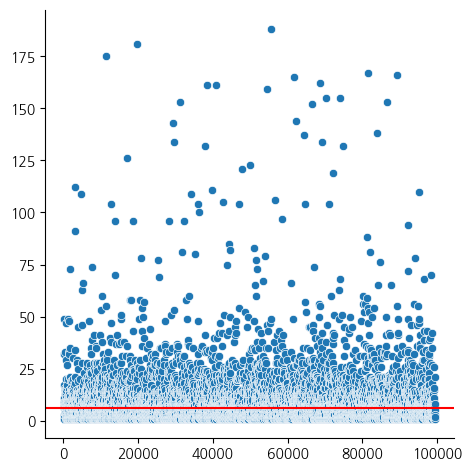

In [ ]:
# 일수만 구하기 -> 이상치 구하려고
days_only = filtered_negative_df[0].dt.days
g = sns.relplot(data=days_only, kind="scatter")
for ax in g.axes.flat:
    ax.axhline(y=6, color='red', linestyle='-',)
plt.show()

In [ ]:
days_only.value_counts()

,count
0,
1,825
2,545
3,500
7,483
4,453
...,...
76,1
166,1
72,1


In [ ]:
days_only.describe()

,0
count,6535.000000
mean,10.620352
std,14.643844
min,1.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,188.000000


In [ ]:
# 이상치 486건
outliers = days_only[days_only>=59]
print(outliers)
outliers.describe()

1621      73
3077      91
3202     112
4666     109
4846      63
        ... 
92212     94
93983     78
95136    110
96550     68
98227     70
Name: 0, Length: 85, dtype: int64


,0
count,85.000000
mean,103.458824
std,35.958823
min,59.000000
25%,73.000000
50%,96.000000
75%,132.000000
max,188.000000


## 이상치 제거 후

In [ ]:
orders_clean = days_only[days_only < 59]
orders_clean

,0
20,11
25,9
41,7
57,1
58,7
...,...
99396,5
99397,3
99423,21
99425,2


In [ ]:
orders_clean.shape[0]/orders.shape[0] *100

6.486258183244336

In [ ]:
orders_clean.describe()

,0
count,6450.000000
mean,9.396899
std,9.237330
min,1.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,58.000000


Text(0.5, 9.444444444444438, '배송지연 일수')

Text(5.319444444444445, 0.5, '건수')

Text(0.5, 1.0, '배송지연 일수에 따른 건수')

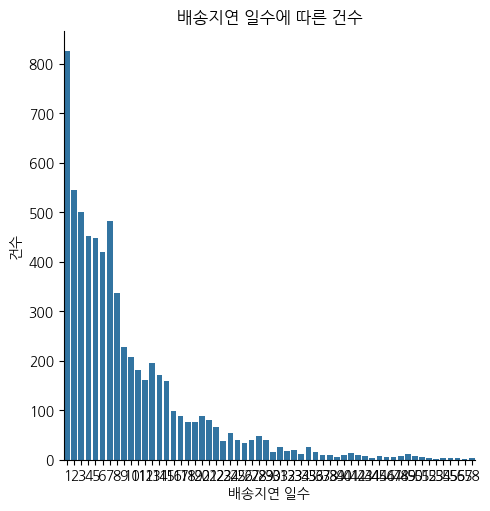

In [ ]:
sns.catplot(orders_clean.value_counts(), kind="bar")
plt.xlabel('배송지연 일수')
plt.ylabel('건수')
plt.title('배송지연 일수에 따른 건수')

## 주요 파생변수 생성(챗GPT)
### 이상치 제거한 수치


In [ ]:
# Step 1: 지연일수만 추출 (일 단위)
days_only = filtered_negative_df[0].dt.days

# Step 2: 59일 미만인 인덱스만 필터링
valid_indices = days_only[days_only < 59].index

# Step 3: 원본 orders에서 해당 인덱스만 선택하여 이상치 제거
orders_clean = orders.loc[valid_indices].copy()

# (선택) 지연일 컬럼 추가
orders_clean['delay_days'] = days_only[days_only < 59].values

# 결과 확인
orders_clean.head()
orders.info()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_delay_days,delay_days
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,11 days 22:23:46,11
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,9 days 22:03:54,9
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,7 days 18:59:23,7
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,1 days 13:28:46,1
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30,7 days 13:37:16,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  object         
 4   order_approved_at              99281 non-null  object         
 5   order_delivered_carrier_date   97658 non-null  object         
 6   order_delivered_customer_date  96476 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   shipping_delay_days            96476 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), object(6), timedelta64[ns](1)
memory usage: 6.8+ MB


In [ ]:
# 1. 두 날짜 컬럼의 차이를 계산하여 Timedelta 시리즈 생성
#    이것은 앞서 df = (end - start) 와 동일한 개념입니다.
delivery_diff = orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']

# 2. Timedelta 시리즈에서 '일(day)' 부분만 정수로 추출
#    예: 1일 12시간 -> 1, 0일 12시간 -> 0, -5일 -> -5
delivery_days = delivery_diff.dt.days

# 3. 지연 일수가 1일 이상인 경우 (>= 1)만 True로 설정
#    이 불리언 결과를 정수(1 또는 0)로 변환
orders['late_delivery_flag'] = (delivery_days >= 1).astype(int)

In [ ]:
# 배송 지연 일수
orders['late_delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

In [ ]:
orders['late_delivery_flag'].value_counts()

,count
late_delivery_flag,
0,92906
1,6535


In [ ]:
# 총배송기간 = order_delivered_customer_date - order_purchase_timestamp
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['total_delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

In [ ]:
orders['total_delivery_days'].value_counts()

,count
total_delivery_days,
7.0,7653
6.0,6805
8.0,6745
9.0,6039
5.0,5810
...,...
109.0,1
189.0,1
173.0,1


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_delay_days,late_delivery_flag,late_delivery_days,total_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8 days +21:25:13,0,-8.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6 days +15:27:45,0,-6.0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18 days +18:06:29,0,-18.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13 days +00:28:42,0,-13.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10 days +18:17:02,0,-10.0,2.0


## 셀러 별 지연 일수 **Top10**


In [ ]:
# 병합: order_id를 기준으로 주문 정보와 아이템 정보를 결합
merged_df = pd.merge(items, orders, on='order_id')

# 날짜 데이터 타입 변환
merged_df['shipping_limit_date'] = pd.to_datetime(merged_df['shipping_limit_date'])
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])

# 지연일 계산: 배송일 - 배송예상일
merged_df['shipping_delay_days'] = (merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']).dt.days

# 지연일 중 양수(지연된 경우)만 필터링
delayed_df = merged_df[merged_df['shipping_delay_days'] > 1]

# 셀러별 평균 지연일 계산
seller_delay_stats = delayed_df.groupby('seller_id')['shipping_delay_days'].agg(['count', 'mean']).reset_index()
seller_delay_stats.columns = ['seller_id', 'delay_count', 'average_delay_days']

# 평균 지연일 기준으로 상위 10개 셀러 추출
top_delayed_sellers = seller_delay_stats.sort_values(by='average_delay_days', ascending=False).head(10)

top_delayed_sellers

,seller_id,delay_count,average_delay_days
1043,df683dfda87bf71ac3fc63063fba369d,1,167.0
1076,e83c76265fc54bf41eac728805e4da77,1,159.0
377,4fb41dff7c50136976d1a5cf004a42e2,1,134.0
257,3340ef1913fb70d28420f6ceb685c339,1,132.0
120,1782ce2db72c3dda627d5e7c898104e1,1,132.0
1115,eebb3372362aa9a46975164bed19a7e7,1,123.0
451,5d378b73ab7dd6f0418d743e5dcb0bd1,1,100.0
589,7a91bf945c6fae0779f1c61ce97fe45c,1,97.0
819,ad420dd0c4f92f8af951ac24b86d0cf5,2,96.5
1049,e09887ca8c7bf8a4621ce481820414ef,1,91.0


## 셀러 별 지연 건수 **Top10**

In [ ]:
top_delay_count_sellers = seller_delay_stats.sort_values(by='delay_count', ascending=False)
top_delay_count_sellers.head(10)
top_delay_count_sellers.info()

,seller_id,delay_count,average_delay_days
349,4a3ca9315b744ce9f8e9374361493884,172,12.040698
166,1f50f920176fa81dab994f9023523100,125,12.360000
345,4869f7a5dfa277a7dca6462dcf3b52b2,111,9.981982
603,7c67e1448b00f6e969d365cea6b010ab,106,12.207547
726,955fee9216a65b617aa5c0531780ce60,89,8.382022
484,6560211a19b47992c3666cc44a7e94c0,89,8.505618
1093,ea8482cd71df3c1969d7b9473ff13abc,85,9.352941
1021,da8622b14eb17ae2831f4ac5b9dab84a,83,12.746988
954,cc419e0650a3c5ba77189a1882b7556a,76,8.934211
682,8b321bb669392f5163d04c59e235e066,72,11.097222


<class 'pandas.core.frame.DataFrame'>
Index: 1196 entries, 349 to 18
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   seller_id           1196 non-null   object 
 1   delay_count         1196 non-null   int64  
 2   average_delay_days  1196 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 37.4+ KB


In [ ]:
# geolocation_zip_code_prefix를 기준으로 각 셀러의 지역 찾기
sellers.rename(columns={'seller_zip_code_prefix': 'geolocation_zip_code_prefix'}, inplace=True)

In [ ]:
sellers.head()

,seller_id,geolocation_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# 병합: order_id를 기준으로 주문 정보와 아이템 정보를 결합
merged_geo_df = pd.merge(geo, sellers, on='geolocation_zip_code_prefix')
merged_geo_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id,seller_city,seller_state
0,1041,-23.544392,-46.639499,sao paulo,SP,e5cbe890e679490127e9a390b46bbd20,sao paulo,SP
1,1035,-23.541578,-46.641607,sao paulo,SP,1d503743d2526f03f0c2c89540ee008c,sao paulo,SP
2,1039,-23.541883,-46.639919,sao paulo,SP,2d34636518ba88f5349b732fcf8ba2e4,sao paulo,SP
3,1041,-23.543539,-46.640577,sao paulo,SP,e5cbe890e679490127e9a390b46bbd20,sao paulo,SP
4,1042,-23.544874,-46.640303,sao paulo,SP,b6c6854d4d92a5f6f46be8869da3fa1a,sao paulo,SP
...,...,...,...,...,...,...,...,...
435082,99700,-27.632807,-52.281268,erechim,RS,968ee78631915a63fef426d6733d7422,erechim,RS
435083,99700,-27.637057,-52.274584,erechim,RS,968ee78631915a63fef426d6733d7422,erechim,RS
435084,99730,-27.729373,-52.537491,jacutinga,RS,d1c7fa84e48cfa21a0e595167c1c500e,jacutinga,RS
435085,99700,-27.641601,-52.272983,erechim,RS,968ee78631915a63fef426d6733d7422,erechim,RS


In [ ]:
id_list = [
    "df683dfda87bf71ac3fc63063fba369d",
    "e83c76265fc54bf41eac728805e4da77",
    "4fb41dff7c50136976d1a5cf004a42e2",
    "3340ef1913fb70d28420f6ceb685c339",
    "1782ce2db72c3dda627d5e7c898104e1",
    "eebb3372362aa9a46975164bed19a7e7",
    "5d378b73ab7dd6f0418d743e5dcb0bd1",
    "7a91bf945c6fae0779f1c61ce97fe45c",
    "ad420dd0c4f92f8af951ac24b86d0cf5",
    "e09887ca8c7bf8a4621ce481820414ef"
]


# 1. isin() 메서드를 사용하여 id_list에 있는 seller_id만 필터링합니다.
filtered_sellers = merged_geo_df[merged_geo_df['seller_id'].isin(id_list)]

# 2. 필터링된 데이터프레임에서 'seller_city'와 'seller_state' 열을 선택합니다.
result = filtered_sellers[['seller_id', 'seller_city', 'seller_state']]

# 결과 출력
result.drop_duplicates()


,seller_id,seller_city,seller_state
13,5d378b73ab7dd6f0418d743e5dcb0bd1,sao paulo,SP
28277,eebb3372362aa9a46975164bed19a7e7,sao paulo,SP
48638,1782ce2db72c3dda627d5e7c898104e1,taboao da serra,SP
65404,e09887ca8c7bf8a4621ce481820414ef,sao paulo,SP
207115,e83c76265fc54bf41eac728805e4da77,aracatuba,SP
264104,7a91bf945c6fae0779f1c61ce97fe45c,mesquita,RJ
324626,ad420dd0c4f92f8af951ac24b86d0cf5,fronteira,MG
336379,4fb41dff7c50136976d1a5cf004a42e2,feira de santana,BA
383934,3340ef1913fb70d28420f6ceb685c339,maringa,PR
426793,df683dfda87bf71ac3fc63063fba369d,farroupilha,RS


In [ ]:
id_list2 = [
    "4a3ca9315b744ce9f8e9374361493884",
    "1f50f920176fa81dab994f9023523100",
    "4869f7a5dfa277a7dca6462dcf3b52b2",
    "7c67e1448b00f6e969d365cea6b010ab",
    "955fee9216a65b617aa5c0531780ce60",
    "6560211a19b47992c3666cc44a7e94c0",
    "ea8482cd71df3c1969d7b9473ff13abc",
    "da8622b14eb17ae2831f4ac5b9dab84a",
    "cc419e0650a3c5ba77189a1882b7556a",
    "8b321bb669392f5163d04c59e235e066"
]
# 1. isin() 메서드를 사용하여 id_list에 있는 seller_id만 필터링합니다.
filtered_sellers = merged_geo_df[merged_geo_df['seller_id'].isin(id_list2)]

# 2. 필터링된 데이터프레임에서 'seller_city'와 'seller_state' 열을 선택합니다.
result = filtered_sellers[['seller_id', 'seller_city', 'seller_state']]

# 결과 출력
result.drop_duplicates()

,seller_id,seller_city,seller_state
1417,8b321bb669392f5163d04c59e235e066,sao paulo,SP
22734,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP
30351,955fee9216a65b617aa5c0531780ce60,sao paulo,SP
41097,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP
66492,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP
70959,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP
131202,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP
179668,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP
183239,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP
197665,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP


### 전체 배송지연 건수에서 차지하는 비율(이상치 포함)(%) 파이차트


([<matplotlib.patches.Wedge at 0x78850a99c7d0>,
 [Text(-0.09085111400075753, 1.0962417959030852, ''),
  Text(-0.24591441129006147, 1.0721595507758455, ''),
  Text(-0.36571254577860085, 1.0374267848191192, ''),
  Text(-0.4717517805856587, 0.993705317241616, ''),
  Text(-0.5626971042764564, 0.9451835635678876, ''),
  Text(-0.6414194672669303, 0.8936336313115165, ''),
  Text(-0.7138398709654707, 0.83691853762478, ''),
  Text(-0.7790319277997267, 0.7766010915963494, ''),
  Text(-0.8360603414227008, 0.7148448121796487, ''),
  Text(-0.8847622884041232, 0.6536020907386232, ''),
  Text(0.5590036546193926, -1.0618450518423876, '')],
 [Text(-0.0702031335460399, 0.8470959331978385, '2.6%'),
  Text(-0.19002477236050203, 0.8284869255995169, '1.9%'),
  Text(-0.28259605810164606, 0.8016479700875011, '1.7%'),
  Text(-0.36453546681619076, 0.7678631996867031, '1.6%'),
  Text(-0.43481139875907987, 0.7303691173024585, '1.4%'),
  Text(-0.4956423156153552, 0.6905350787407173, '1.4%'),
  Text(-0.551603536655

Text(0.5, 0.95, '전체 6535건 중 각 항목별 지연 건수 비율')

(np.float64(-1.0534163244071686),
 np.float64(1.1465835477655877),
 np.float64(-1.1929112673202211),
 np.float64(1.1044243460628678))

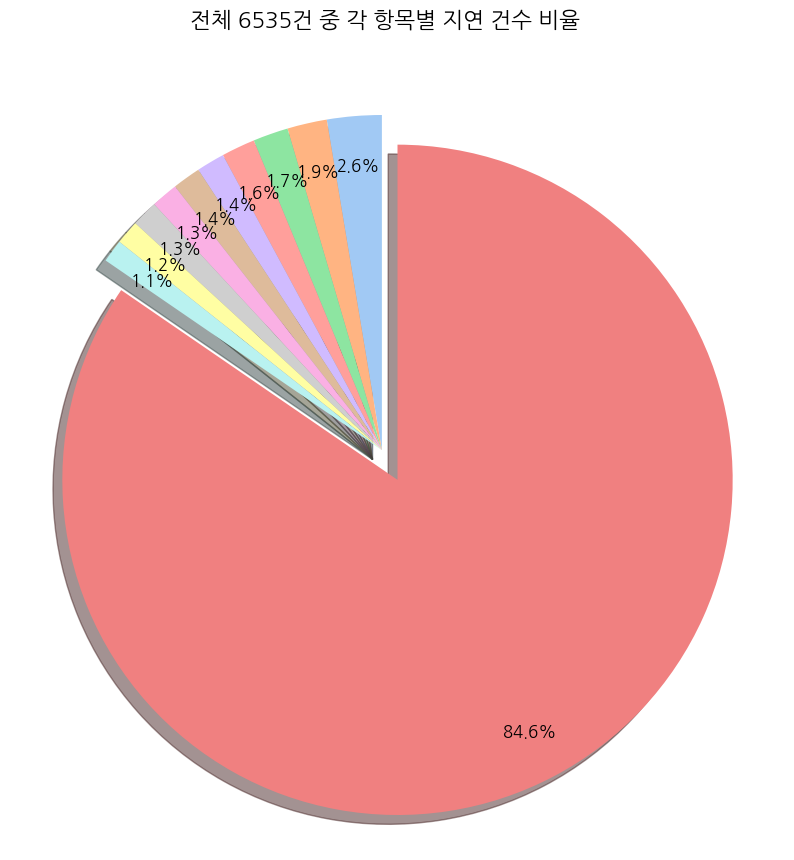

In [ ]:
# 1. 데이터 준비
total_cases = 6535 # 전체 건수
counts = [172, 125, 111, 106, 89, 89, 85, 83, 76, 72]

# Top 10 외 나머지 항목의 건수 계산
other_counts = total_cases - sum(counts)
counts.append(other_counts) # 'Others'는 항상 마지막에 추가됩니다.


# 2. 'Others' 부분 강조를 위한 설정

# 'Others'의 인덱스 (리스트의 마지막 요소이므로 len(counts) - 1)
others_index = len(counts) - 1 # 또는 labels.index('Others')

# explode 리스트 생성: 'Others'만 분리하고 나머지는 0
explode = [0] * len(counts) # 모든 조각에 0을 채웁니다.
explode[others_index] = 0.1 # 'Others' 조각만 0.1만큼 분리 (원하는 값으로 조절)

# 색상 리스트 생성: 'Others'만 다른 색으로 지정
colors = sns.color_palette('pastel', n_colors=len(counts)) # 기본 팔레트
others_highlight_color = 'lightcoral' # 'Others'에 적용할 색상 (예: 밝은 산호색, 회색 등)
colors[others_index] = others_highlight_color # 'Others'의 색상 변경

# 3. 파이 차트 그리기
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(
    counts,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    explode=explode,  # 'Others'를 강조하도록 수정된 explode 적용
    shadow=True,
    colors=colors,    # 'Others'를 강조하도록 수정된 colors 적용
    textprops={'fontsize': 12, 'color': 'black'}
)

fig.suptitle(f'전체 {total_cases}건 중 각 항목별 지연 건수 비율', fontsize=16, y=0.95)
ax.axis('equal') # 원형으로 보이도록 설정
plt.show()

<Figure size 1000x1000 with 0 Axes>

([<matplotlib.patches.Wedge at 0x78850e956310>,
 [Text(-0.5873709739109126, 0.9886836394959442, '4a3ca9... (172건)'),
  Text(-1.0934619994000478, 0.11975331255564406, '1f50f9... (125건)'),
  Text(-0.8911262439142362, -0.6448984551131327, '4869f7... (111건)'),
  Text(-0.2913182138965782, -1.0607231958678511, '7c67e1... (106건)'),
  Text(0.3665417329880675, -1.0371341080005538, '955fee... (89건)'),
  Text(0.857873226922261, -0.688515451191901, '656021... (89건)'),
  Text(1.0901366374207264, -0.1469765687211118, 'ea8482... (85건)'),
  Text(1.0175741504648905, 0.4177832551762415, 'da8622... (83건)'),
  Text(0.6965060639318316, 0.8513984395723236, 'cc419e... (76건)'),
  Text(0.24477276313722313, 1.072420763705258, '8b321b... (72건)')],
 [Text(-0.45968163175636634, 0.7737524135185649, '17.1%'),
  Text(-0.8449479086273096, 0.0925366506111795, '12.4%'),
  Text(-0.6885975521155461, -0.4983306244056025, '11.0%'),
  Text(-0.22510952892008312, -0.8196497422615212, '10.5%'),
  Text(0.2832367936725976, -0.801

Text(0.5, 1.0, 'Top 10 셀러 ID별 지연 건수 비율 (총 1008건)')

(np.float64(-1.09999977450132),
 np.float64(1.0999999655854198),
 np.float64(-1.102149301554691),
 np.float64(1.1451355569454837))

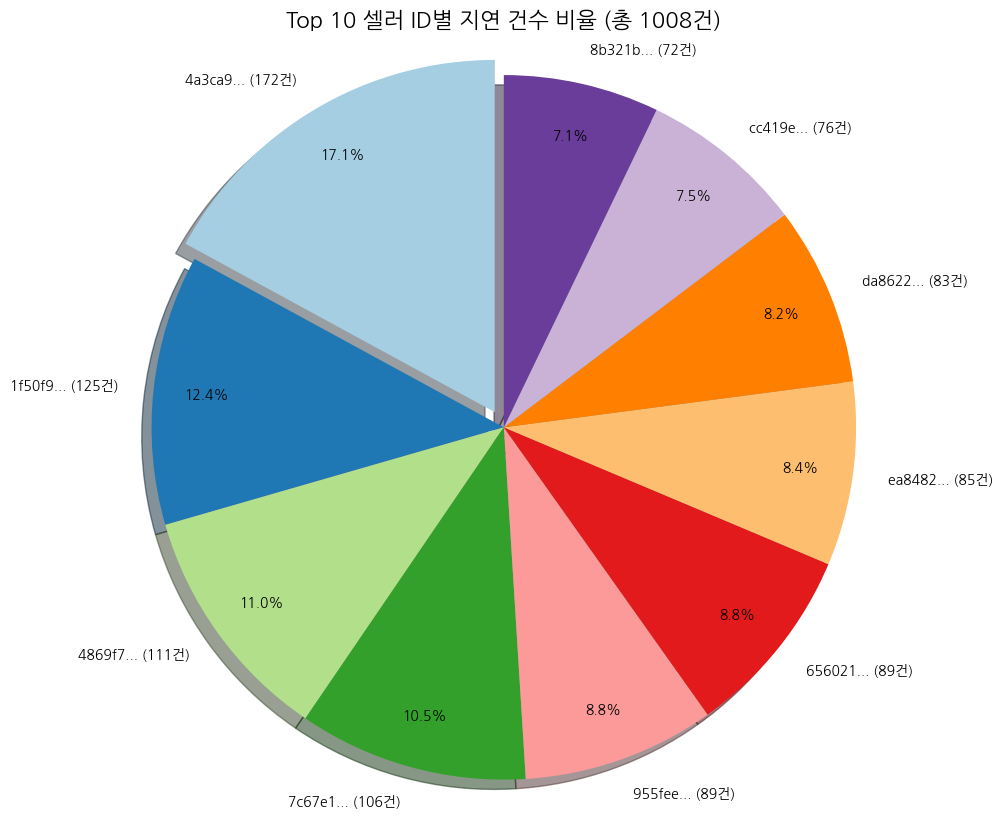

In [ ]:
# 1. 데이터 준비
id_list2 = [
    "4a3ca9315b744ce9f8e9374361493884",
    "1f50f920176fa81dab994f9023523100",
    "4869f7a5dfa277a7dca6462dcf3b52b2",
    "7c67e1448b00f6e969d365cea6b010ab",
    "955fee9216a65b617aa5c0531780ce60",
    "6560211a19b47992c3666cc44a7e94c0",
    "ea8482cd71df3c1969d7b9473ff13abc",
    "da8622b14eb17ae2831f4ac5b9dab84a",
    "cc419e0650a3c5ba77189a1882b7556a",
    "8b321bb669392f5163d04c59e235e066"
]

counts = [172, 125, 111, 106, 89, 89, 85, 83, 76, 72]

# 총 건수 계산 (파이차트 제목에 사용)
total_given_counts = sum(counts)

# 레이블 생성: ID와 해당 건수를 함께 표시하여 가독성을 높입니다.
labels = [f'{id[:6]}... ({count}건)' for id, count in zip(id_list2, counts)]
# 참고: ID가 너무 길어 차트가 복잡해질 수 있으므로, ID의 앞 6자리만 표시하고 나머지는 '...'으로 처리했습니다.
# 필요에 따라 labels = id_list2 로 사용하거나, labels = [f'Seller {i+1} ({count}건)' for i, count in enumerate(counts)] 와 같이 변경할 수 있습니다.


# 파이 차트 조각 강조 (선택 사항): 가장 큰 조각을 살짝 떼어내어 강조
# 여기서는 가장 큰 건수를 가진 ID를 강조합니다.
max_count = max(counts)
explode = [0.05 if count == max_count else 0 for count in counts]

# 색상 팔레트 설정 (선택 사항)
# 각 ID에 다른 색상을 지정합니다.
colors = sns.color_palette('Paired', n_colors=len(counts)) # 'Paired'는 대비되는 색상을 제공합니다.
# 다른 팔레트 예시: 'viridis', 'plasma', 'cividis', 'tab10', 'Set3', 'hls'

# 2. 파이 차트 그리기
plt.figure(figsize=(10, 10)) # 그래프의 크기 설정

plt.pie(
    counts,              # 각 조각의 크기
    labels=labels,       # 각 조각에 대한 레이블
    autopct='%1.1f%%',   # 각 조각의 비율을 퍼센트로 표시 (소수점 첫째 자리까지)
    startangle=90,       # 첫 번째 조각이 12시 방향에서 시작
    pctdistance=0.85,    # 퍼센트 텍스트의 위치 (중심으로부터의 거리)
    explode=explode,     # 조각 강조 (가장 큰 조각만 분리)
    shadow=True,         # 그림자 효과
    colors=colors,       # 색상 팔레트 적용
    textprops={'fontsize': 10, 'color': 'black'} # 텍스트 스타일 (ID가 길면 폰트 크기 조절)
)

# 차트 제목 설정 (총 건수 포함)
plt.title(f'Top 10 셀러 ID별 지연 건수 비율 (총 {total_given_counts}건)', fontsize=16)

# 원형으로 보이기 위해 설정 (필수)
plt.axis('equal')

# 범례 추가 (선택 사항, 레이블이 너무 길어 차트 안에 표시하기 어려울 때 유용)
# plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

plt.show()

In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# 병합: order_id를 기준으로 주문 정보와 아이템 정보를 결합
merged_df_2 = pd.merge(items, products, on='product_id')

In [ ]:
# merged_df_2 생성
merged_df_2 = pd.merge(items, products, on='product_id', how='left') # left merge로 product_id 없어도 seller 정보 유지

# --- 1. 찾고자 하는 seller_id 리스트 ---
id_list2 = [
    "4a3ca9315b744ce9f8e9374361493884",
    "1f50f920176fa81dab994f9023523100",
    "4869f7a5dfa277a7dca6462dcf3b52b2",
    "7c67e1448b00f6e969d365cea6b010ab",
    "955fee9216a65b617aa5c0531780ce60",
    "6560211a19b47992c3666cc44a7e94c0",
    "ea8482cd71df3c1969d7b9473ff13abc",
    "da8622b14eb17ae2831f4ac5b9dab84a",
    "cc419e0650a3c5ba77189a1882b7556a",
    "8b321bb669392f5163d04c59e235e066"
]

# --- 2. id_list2에 있는 ID가 파는 아이템 찾기 ---

# 먼저 id_list2에 있는 seller_id만 포함하도록 merged_df_2를 필터링합니다.
filtered_df = merged_df_2[merged_df_2['seller_id'].isin(id_list2)]

# 필터링된 데이터프레임에서 seller_id별로 그룹화하고 고유한 product_category_name을 추출합니다.
seller_items_for_list2 = filtered_df.groupby('seller_id')['product_category_name'].unique()

print("id_list2에 있는 판매자들이 판매하는 제품 카테고리:")
print(seller_items_for_list2)
print("\n" + "="*50 + "\n")

id_list2에 있는 판매자들이 판매하는 제품 카테고리:
seller_id
1f50f920176fa81dab994f9023523100    [ferramentas_jardim, sinalizacao_e_seguranca, ...
4869f7a5dfa277a7dca6462dcf3b52b2    [relogios_presentes, cool_stuff, beleza_saude,...
4a3ca9315b744ce9f8e9374361493884    [cama_mesa_banho, casa_conforto, moveis_decora...
6560211a19b47992c3666cc44a7e94c0    [fashion_bolsas_e_acessorios, relogios_present...
7c67e1448b00f6e969d365cea6b010ab    [moveis_escritorio, moveis_decoracao, esporte_...
8b321bb669392f5163d04c59e235e066    [eletronicos, climatizacao, instrumentos_music...
955fee9216a65b617aa5c0531780ce60    [esporte_lazer, construcao_ferramentas_ilumina...
cc419e0650a3c5ba77189a1882b7556a     [beleza_saude, telefonia, perfumaria, alimentos]
da8622b14eb17ae2831f4ac5b9dab84a    [cama_mesa_banho, beleza_saude, moveis_decorac...
ea8482cd71df3c1969d7b9473ff13abc                              [telefonia, automotivo]
Name: product_category_name, dtype: object




In [ ]:
# merged_df_2 생성
merged_df_2 = pd.merge(items, products, on='product_id', how='left') # left merge로 product_id 없어도 seller 정보 유지

# --- 1. 찾고자 하는 seller_id 리스트 ---
id_list3 = [
    "df683dfda87bf71ac3fc63063fba369d",
    "e83c76265fc54bf41eac728805e4da77",
    "4fb41dff7c50136976d1a5cf004a42e2",
    "3340ef1913fb70d28420f6ceb685c339",
    "1782ce2db72c3dda627d5e7c898104e1",
    "eebb3372362aa9a46975164bed19a7e7",
    "5d378b73ab7dd6f0418d743e5dcb0bd1",
    "7a91bf945c6fae0779f1c61ce97fe45c",
    "ad420dd0c4f92f8af951ac24b86d0cf5",
    "e09887ca8c7bf8a4621ce481820414ef"
]
# --- 2. id_list2에 있는 ID가 파는 아이템 찾기 ---

# 먼저 id_list2에 있는 seller_id만 포함하도록 merged_df_2를 필터링합니다.
filtered_df = merged_df_2[merged_df_2['seller_id'].isin(id_list3)]

# 필터링된 데이터프레임에서 seller_id별로 그룹화하고 고유한 product_category_name을 추출합니다.
seller_items_for_list3 = filtered_df.groupby('seller_id')['product_category_name'].unique()

print("id_list2에 있는 판매자들이 판매하는 제품 카테고리:")
print(seller_items_for_list3)
print("\n" + "="*50 + "\n")

id_list2에 있는 판매자들이 판매하는 제품 카테고리:
seller_id
1782ce2db72c3dda627d5e7c898104e1    [esporte_lazer, relogios_presentes, nan]
3340ef1913fb70d28420f6ceb685c339                    [informatica_acessorios]
4fb41dff7c50136976d1a5cf004a42e2                        [relogios_presentes]
5d378b73ab7dd6f0418d743e5dcb0bd1                                       [nan]
7a91bf945c6fae0779f1c61ce97fe45c                              [beleza_saude]
ad420dd0c4f92f8af951ac24b86d0cf5                  [beleza_saude, brinquedos]
df683dfda87bf71ac3fc63063fba369d                          [moveis_decoracao]
e09887ca8c7bf8a4621ce481820414ef                          [moveis_decoracao]
e83c76265fc54bf41eac728805e4da77                                [automotivo]
eebb3372362aa9a46975164bed19a7e7                                 [telefonia]
Name: product_category_name, dtype: object


